# Logistic Regression

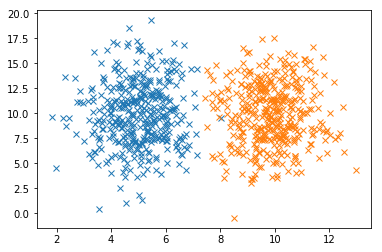

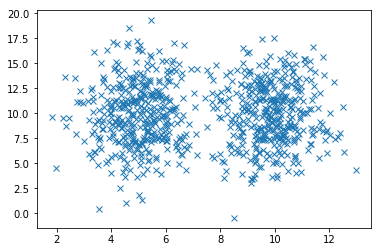

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale


# sigmoid function
def sigmoid(x,deriv=False):
    return 1/(1+np.exp(-x))


def LogisticRegression(X,y,alpha=0.1,lamda=0.1,iteraciones=1000):   
    if X.ndim > 1:
        [M,N] = X.shape
    else:
        M = X.shape[0]
        N = 1
        X = X[:,None]

    VectorBias = np.ones(shape=(M,1))
    X = np.concatenate((VectorBias,X),axis=1)
    
    theta = np.random.rand(N+1,1)
    
    for j in range(0,iteraciones):

        h_x = sigmoid(np.dot(X,theta))
        J0 = (1-y)*np.log(1-h_x)
        J1 = y*np.log(h_x)

        J0[np.isinf(J0)]=0
        J1[np.isinf(J1)]=0
        
        J0 = -1/M * np.sum(J0)
        J1 = -1/M * np.sum(J1)
        
        J = J1+J0
        dJ_dtheta = 1/(M)*np.dot((h_x-y).T,X).T
        theta = theta - alpha* dJ_dtheta
    
        theta[1:] = theta[1:] - alpha*lamda/M*theta[1:] #Regularization
    return theta


#Creación de los datos
mean = [5, 10]
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, 400).T
plt.plot(x1, x2, 'x')

X_C1 = np.concatenate((x1[:,None],x2[:,None]),axis=1)
Y_C1 = np.zeros(shape = (400,1))

mean = [10, 10]
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, 400).T
plt.plot(x1, x2, 'x')
plt.show()

X_C2 = np.concatenate((x1[:,None],x2[:,None]),axis=1)
Y_C2 = np.ones(shape = (400,1))

Xdata = np.concatenate((X_C1,X_C2),axis=0)
Ydata = np.concatenate((Y_C1,Y_C2),axis=0)
plt.plot(Xdata[:,0], Xdata[:,1], 'x')
plt.show()

In [3]:
theta= LogisticRegression(Xdata,Ydata,alpha=0.1,lamda=0,iteraciones=10000)

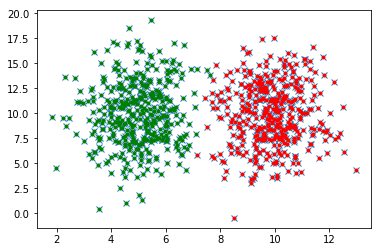

In [4]:
[M,N] = Xdata.shape

VectorBias = np.ones(shape=(M,1))
X = np.concatenate((VectorBias,Xdata),axis=1)
    
plt.plot(Xdata[:,0], Xdata[:,1], 'x')

ind1 = sigmoid(np.dot(X,theta)) > 0.5
ind0 = sigmoid(np.dot(X,theta)) < 0.5
plt.plot(Xdata[ind1[:,0],0], Xdata[ind1[:,0],1], '.r')
plt.plot(Xdata[ind0[:,0],0], Xdata[ind0[:,0],1], '.g')
plt.show()

In [14]:
np.sum((sigmoid(np.dot(X,theta))>0.5) == Ydata)/len(Ydata)

0.995

In [11]:
.shape

(800, 1)